In [68]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [69]:
# Data Import
df = pd.read_csv("energydata.csv")

In [70]:
df_schema = pd.read_csv('schema.csv', index_col=None)
df_schema.head()

,Date,time year-month-day hour:minute:second
0,Appliances,energy use in Wh
1,lights,energy use of light fixtures in the house in Wh
2,T1,"Temperature in kitchen area, in Celsius"
3,RH_1,"Humidity in kitchen area, in %"
4,T2,"Temperature in living room area, in Celsius"


### Dataset Overview

In [71]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [73]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## Question 12

### From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [86]:
from sklearn import metrics 
import sklearn.linear_model as linear_model

In [75]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [179]:
# SELECT X AND Y FROM DATASET and Reshape to 2D
X = df['T2'].values.reshape(-1, 1)
Y = df['T6'].values.reshape(-1, 1)

In [180]:
# Split data into Training and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [181]:
lnr = linear_model.LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [182]:
### Make Prediciton using Test Data
y_predicted = lnr.predict(x_test)

In [183]:
r2_sc = metrics.r2_score(y_test, y_predicted)
r2_sc.round(2)

0.64

### Question 13

### Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [99]:
# Drop date and Lights
df_new = df.drop(['date', 'lights'], axis=1)

In [100]:
df_new.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [190]:
# Data Nomalization
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
scaled = mx.fit_transform(df_new)
normalized_df = pd.DataFrame(scaled, columns=df_new.columns)
x_normalized = normalized_df.drop(['Appliances'], axis=1)
y_normalized = normalized_df['Appliances']

In [191]:
# Split Data in 70:30
x_train,x_test, y_train, y_test = train_test_split(x_normalized,y_normalized,test_size=0.3, random_state=42)

In [192]:
# Train Model
lnr = linear_model.LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [193]:
y_predicted = lnr.predict(x_test)
y_predicted

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

### Question 13 - Mean Absolute Error

In [194]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
print("The Mean Absolute Error is ", mae.round(2))

The Mean Absolute Error is  0.05


### Question 14 - Residual Sum of Squares

In [195]:
r_sum_square = ((y_test - y_predicted)** 2).sum().round(2)
print("The Residual Sum of Squares is ", r_sum_square)

The Residual Sum of Squares is  45.35


### Question 15 - What is the Root Mean Squared Error (in three decimal places)?

In [196]:
rmse = metrics.mean_squared_error(y_test, y_predicted)
print("The Root Mean Squared Error is ", rmse.round(3))

The Root Mean Squared Error is  0.008


### Question 16 - What is the Coefficient of Determination (in two decimal places)?

In [197]:
# Coefficient of determination also called as R2 score
r2_sc = metrics.r2_score(y_test, y_predicted)
print("The Root Mean Squared Error is ", r2_sc.round(2))

The Root Mean Squared Error is  0.15


### Question 17 - Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [198]:
x_normalized.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [199]:
len(lnr.coef_)

26

In [200]:
lowest = lnr.coef_.min()
highest = lnr.coef_.max()
print("The Lowest Weight", lowest)
print("The Lowest Weight", highest)


The Lowest Weight -0.45669794833850036
The Lowest Weight 0.5535465998386402


Feature: T1, Score: -0.00328
Feature: RH_1, Score: 0.55355
Feature: T2, Score: -0.23618
Feature: RH_2, Score: -0.45670
Feature: T3, Score: 0.29063
Feature: RH_3, Score: 0.09605
Feature: T4, Score: 0.02898
Feature: RH_4, Score: 0.02639
Feature: T5, Score: -0.01566
Feature: RH_5, Score: 0.01601
Feature: T6, Score: 0.23642
Feature: RH_6, Score: 0.03805
Feature: T7, Score: 0.01032
Feature: RH_7, Score: -0.04461
Feature: T8, Score: 0.10200
Feature: RH_8, Score: -0.15760
Feature: T9, Score: -0.18994
Feature: RH_9, Score: -0.03980
Feature: T_out, Score: -0.32186
Feature: Press_mm_hg, Score: 0.00684
Feature: RH_out, Score: -0.07767
Feature: Windspeed, Score: 0.02918
Feature: Visibility, Score: 0.01231
Feature: Tdewpoint, Score: 0.11776
Feature: rv1, Score: 0.00077
Feature: rv2, Score: 0.00077


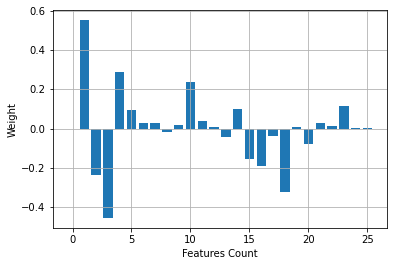

In [202]:
# get importance
importance = lnr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (x_normalized.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features Count')
plt.ylabel('Weight')
plt.grid('on')
plt.show()

### Question 18 - Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [156]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [157]:
reg_y_predicted = ridge_reg.predict(x_test)
reg_y_predicted 

array([0.03321872, 0.24043824, 0.03461337, ..., 0.06872351, 0.10025536,
       0.05851175])

In [158]:
reg_rmse = metrics.mean_squared_error(y_test, reg_y_predicted)
print("The Root Mean Squared Error is ", reg_rmse.round(3))

The Root Mean Squared Error is  0.008


### Question 19 - Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [167]:
from sklearn.linear_model import Lasso
lasso_reg = Ridge(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Ridge(alpha=0.001)

Feature: T1, Score: -0.00332
Feature: RH_1, Score: 0.55345
Feature: T2, Score: -0.23608
Feature: RH_2, Score: -0.45657
Feature: T3, Score: 0.29062
Feature: RH_3, Score: 0.09605
Feature: T4, Score: 0.02898
Feature: RH_4, Score: 0.02638
Feature: T5, Score: -0.01567
Feature: RH_5, Score: 0.01601
Feature: T6, Score: 0.23637
Feature: RH_6, Score: 0.03804
Feature: T7, Score: 0.01032
Feature: RH_7, Score: -0.04462
Feature: T8, Score: 0.10199
Feature: RH_8, Score: -0.15759
Feature: T9, Score: -0.18994
Feature: RH_9, Score: -0.03980
Feature: T_out, Score: -0.32167
Feature: Press_mm_hg, Score: 0.00684
Feature: RH_out, Score: -0.07760
Feature: Windspeed, Score: 0.02919
Feature: Visibility, Score: 0.01231
Feature: Tdewpoint, Score: 0.11765
Feature: rv1, Score: 0.00077
Feature: rv2, Score: 0.00077


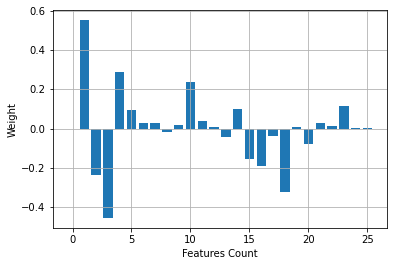

In [187]:
# get importance
lasso_reg_importance = lasso_reg.coef_
# summarize feature importance
for i,v in enumerate(lasso_reg_importance):
	print('Feature: %0s, Score: %.5f' % (x_normalized.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(lasso_reg_importance))], lasso_reg_importance)
plt.xlabel('Features Count')
plt.ylabel('Weight')
plt.grid('on')
plt.show()


In [171]:
len(lasso_reg.coef_)

26

### Question 20 - What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [173]:
lasso_reg_y_predicted = lasso_reg.predict(x_test)
lasso_reg_y_predicted

array([0.033222  , 0.24410629, 0.03400175, ..., 0.06844752, 0.10032293,
       0.05722543])

In [174]:
lasso_rmse = metrics.mean_squared_error(y_test, lasso_reg_y_predicted)
print("The Root Mean Squared Error is ", lasso_rmse.round(3))

The Root Mean Squared Error is  0.008


In [175]:
lasso_rmse

0.007658782257269709

In [176]:
reg_rmse

0.007662176129398587

In [178]:
rmse

0.007658778867195367